In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import sys
sys.path.insert(0, os.getcwd()[:-6])
from v2i.src.core.common import loadPKL, savePKL, readYaml

In [2]:
withCommSingleFrameDatFile = "/home/mayank/ray_results/WithCommSingleFrame/PPO_v2i-v0_0_2019-09-10_19-42-13m8bg1qz7/data_tf_disabled.pkl"
withCommRestricFrameDatFile = "/home/mayank/ray_results/RestrictedCommSingleFrame/PPO_v2i-v0_0_2019-09-11_00-45-07zw2s_ieg/data_tf_disabled.pkl"

In [3]:
withCommRestricFrameData = loadPKL(withCommRestricFrameDatFile)
withCommSingleFrameData = loadPKL(withCommSingleFrameDatFile)

# Speed Distribution, Full Episodes only

In [4]:
withCommSingleFrameSpeeds = {}

for density in withCommSingleFrameData["data"]:
    withCommSingleFrameSpeeds[density] = []

for density in withCommSingleFrameData["data"]:
    for episode in withCommSingleFrameData["data"][density]:
        for step in withCommSingleFrameData["data"][density][episode]['speed']:
            if len(withCommSingleFrameData["data"][density][episode]['speed']) == withCommSingleFrameData["max-episode-length"]:
                withCommSingleFrameSpeeds[density].append(step * 3.6)

withCommRestrictedSpeeds = {}

for density in withCommRestricFrameData["data"]:
    withCommRestrictedSpeeds[density] = []

for density in withCommRestricFrameData["data"]:
    for episode in withCommRestricFrameData["data"][density]:
        for step in withCommRestricFrameData["data"][density][episode]['speed']:
            if len(withCommRestricFrameData["data"][density][episode]['speed']) == withCommRestricFrameData["max-episode-length"]:
                withCommRestrictedSpeeds[density].append(step * 3.6)

/home/mayank/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


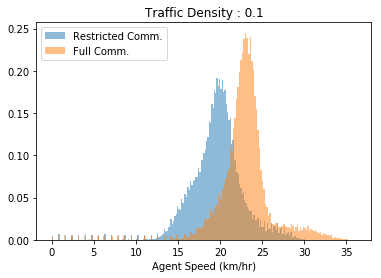

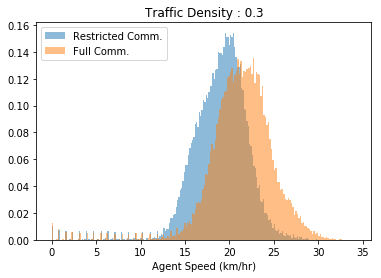

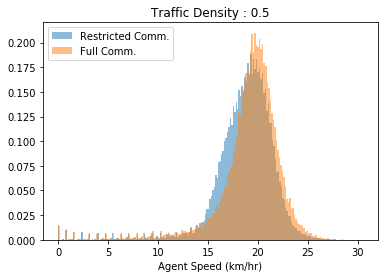

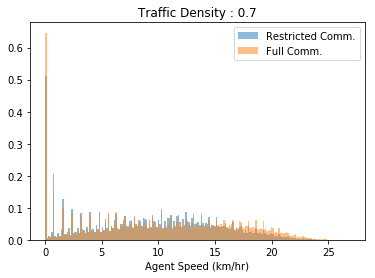

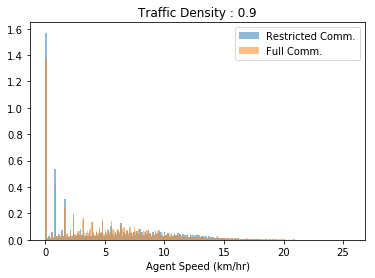

In [6]:
for density in withCommRestrictedSpeeds.keys():
    plt.hist(withCommRestrictedSpeeds[density], normed=1, bins=200, alpha=0.5, label="Restricted Comm.")
    plt.hist(withCommSingleFrameSpeeds[density], normed=1, bins=200, alpha=0.5, label="Full Comm.")
    plt.legend()
    plt.title("Traffic Density : %.1f"%(density))
    plt.xlabel("Agent Speed (km/hr)")
    plt.show()